In [2]:
pwd

'/Users/elika_sinha/Documents/UCL/2. Quantitative Methodologies/Assessment3'

# 1. Loading Libraries

In [3]:
import os
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import statsmodels.api as sms
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn›

# 2. Loading Data

## Trips_GreaterLondon

In [4]:
# trips_Greater London

url1 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/Ltds_page1_GreaterLondon.csv'
df1 = pd.read_csv(url1, sep = ",", header = 0, na_values= " ")
df1.columns = df1.columns.str.replace(' ','_')
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")
df1.info() 

Data frame is 10 x 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10 non-null     object 
 1   2005/06      10 non-null     int64  
 2   2006/07      10 non-null     int64  
 3   2007/08      10 non-null     int64  
 4   2008/09      10 non-null     int64  
 5   2009/10      10 non-null     int64  
 6   2010/11      10 non-null     int64  
 7   2011/12      10 non-null     int64  
 8   2012/13      10 non-null     int64  
 9   2013/14      10 non-null     int64  
 10  2014/15      10 non-null     int64  
 11  2015/16      10 non-null     int64  
 12  2016/17      10 non-null     int64  
 13  2017/18      10 non-null     int64  
 14  2018/19      10 non-null     int64  
 15  2019/20      10 non-null     int64  
 16  Unnamed:_16  0 non-null      float64
 17  Unnamed:_17  0 non-null      float64
 18  Unnamed:_18  0 non-null      fl

In [5]:
df1.describe()

,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,...,Unnamed:_16,Unnamed:_17,Unnamed:_18,Unnamed:_19,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Unnamed:_25
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.628207e+06,3.738753e+06,3.758179e+06,3.490562e+06,3.530661e+06,3.700175e+06,3.849337e+06,3.880145e+06,3.948128e+06,3.793347e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.472280e+06,5.617337e+06,5.645717e+06,5.223374e+06,5.281335e+06,5.524033e+06,5.746354e+06,5.791280e+06,5.886680e+06,5.636692e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.430600e+04,8.762900e+04,9.385000e+04,9.447000e+04,9.040900e+04,6.338800e+04,8.098800e+04,9.027800e+04,7.135800e+04,6.203100e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.133078e+05,4.262432e+05,4.428152e+05,4.514762e+05,4.804800e+05,5.333865e+05,6.315842e+05,6.325535e+05,6.472478e+05,6.825612e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.765976e+06,1.927373e+06,1.957407e+06,1.787680e+06,1.811494e+06,1.908446e+06,1.962646e+06,1.964598e+06,2.029352e+06,2.032928e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.543955e+06,4.472472e+06,4.492157e+06,4.045647e+06,4.073597e+06,4.274488e+06,4.372127e+06,4.231703e+06,4.470398e+06,4.002292e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.814104e+07,1.869376e+07,1.879090e+07,1.745281e+07,1.765331e+07,1.850087e+07,1.924668e+07,1.940072e+07,1.974064e+07,1.896674e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# write the column names required for assessment need from the whole data above
cols1 = ['ID','2005/06','2006/07','2007/08','2008/09','2009/10','2010/11','2011/12','2012/13','2013/14','2014/15','2015/16','2016/17','2017/18','2018/19','2019/20']

In [7]:
# deleting the originally loaded csv and reloading the csv with the required columns for assessment
del(df1)
df1 = pd.read_csv(url1, usecols=cols1, nrows=100000)
df1.columns = df1.columns.str.replace(' ','_')
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")
df1.info()

Data frame is 10 x 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10 non-null     object
 1   2005/06  10 non-null     int64 
 2   2006/07  10 non-null     int64 
 3   2007/08  10 non-null     int64 
 4   2008/09  10 non-null     int64 
 5   2009/10  10 non-null     int64 
 6   2010/11  10 non-null     int64 
 7   2011/12  10 non-null     int64 
 8   2012/13  10 non-null     int64 
 9   2013/14  10 non-null     int64 
 10  2014/15  10 non-null     int64 
 11  2015/16  10 non-null     int64 
 12  2016/17  10 non-null     int64 
 13  2017/18  10 non-null     int64 
 14  2018/19  10 non-null     int64 
 15  2019/20  10 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 1.4+ KB


In [8]:
print(df1.columns)

Index(['ID', '2005/06', '2006/07', '2007/08', '2008/09', '2009/10', '2010/11',
       '2011/12', '2012/13', '2013/14', '2014/15', '2015/16', '2016/17',
       '2017/18', '2018/19', '2019/20'],
      dtype='object')


In [9]:
# transpose rows and column heads; keeping ID as the index
df1 = df1.set_index('ID').transpose()

In [10]:
# printing to check whether they are swapped
print(df1)

ID       National Rail  Underground/DLR  Bus/tram  Taxi/other  Car driver  \
2005/06         776010          1192066   2470533      190387     5235096   
2006/07         765514          1265644   2597678      275740     5097403   
2007/08         752692          1339351   2593402      240848     5125075   
2008/09         809296          1365011   2682388      187576     4500067   
2009/10         849546          1308377   2637303      214387     4552362   
2010/11         924690          1470972   2806137      250753     4763939   
2011/12         947518          1476535   2829366      252529     4886381   
2012/13        1061933          1624124   2821797      260354     4701672   
2013/14        1007982          1560290   2987290      254256     4964768   
2014/15        1078946          1684928   2816303      269608     4397621   
2015/16        1038097          1742812   2708612      294398     4536491   
2016/17        1078265          1717021   2379287      276835     4159885   

In [11]:
df1.columns = df1.columns.str.replace(' ', '_')

In [12]:
# checking a random sample of the csv
df1.sample(5, random_state=5)

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All
2010/11,924690,1470972,2806137,250753,4763939,2345919,63388,402952,5472124,18500873
2006/07,765514,1265644,2597678,275740,5097403,2589102,87629,313153,5701901,18693763
2012/13,1061933,1624124,2821797,260354,4701672,2305073,90278,489427,6046066,19400724
2007/08,752692,1339351,2593402,240848,5125075,2575463,93850,339523,5730691,18790896
2015/16,1038097,1742812,2708612,294398,4536491,2293909,93195,463871,5493823,18665208


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   National_Rail    15 non-null     int64
 1   Underground/DLR  15 non-null     int64
 2   Bus/tram         15 non-null     int64
 3   Taxi/other       15 non-null     int64
 4   Car_driver       15 non-null     int64
 5   Car_passenger    15 non-null     int64
 6   Motorcycle       15 non-null     int64
 7   Cycle            15 non-null     int64
 8   Walk             15 non-null     int64
 9   All              15 non-null     int64
dtypes: int64(10)
memory usage: 1.3+ KB


In [14]:
list(df1.columns.values)

['National_Rail',
 'Underground/DLR',
 'Bus/tram',
 'Taxi/other',
 'Car_driver',
 'Car_passenger',
 'Motorcycle',
 'Cycle',
 'Walk',
 'All']

In [15]:
# adding columns to df1 for assessment
df1["Total_Public_Transport"] = " "
df1.to_csv(url1, index=False)
df1["Total_Private_Transport"] = " "
df1.to_csv(url1, index=False)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   National_Rail            15 non-null     int64 
 1   Underground/DLR          15 non-null     int64 
 2   Bus/tram                 15 non-null     int64 
 3   Taxi/other               15 non-null     int64 
 4   Car_driver               15 non-null     int64 
 5   Car_passenger            15 non-null     int64 
 6   Motorcycle               15 non-null     int64 
 7   Cycle                    15 non-null     int64 
 8   Walk                     15 non-null     int64 
 9   All                      15 non-null     int64 
 10  Total_Public_Transport   15 non-null     object
 11  Total_Private_Transport  15 non-null     object
dtypes: int64(10), object(2)
memory usage: 1.5+ KB


In [17]:
df1['Total_Public_Transport'] = df1['National_Rail'] + df1['Underground/DLR'] + df1['Bus/tram'] + df1['Bus/tram'] + df1['Cycle'] + df1 ['Walk']

In [18]:
df1['Total_Private_Transport'] = df1['Taxi/other'] + df1['Car_passenger'] + df1['Motorcycle'] 

In [19]:
# checking a random sample of the csv
df1.sample(5, random_state=5)

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
2010/11,924690,1470972,2806137,250753,4763939,2345919,63388,402952,5472124,18500873,13883012,2660060
2006/07,765514,1265644,2597678,275740,5097403,2589102,87629,313153,5701901,18693763,13241568,2952471
2012/13,1061933,1624124,2821797,260354,4701672,2305073,90278,489427,6046066,19400724,14865144,2655705
2007/08,752692,1339351,2593402,240848,5125075,2575463,93850,339523,5730691,18790896,13349061,2910161
2015/16,1038097,1742812,2708612,294398,4536491,2293909,93195,463871,5493823,18665208,14155827,2681502


In [20]:
df1['Total_Public_Transport'].astype(str).astype(int)
df1['Total_Private_Transport'].astype(str).astype(int)

2005/06    2614579
2006/07    2952471
2007/08    2910161
2008/09    2492394
2009/10    2619407
2010/11    2660060
2011/12    2782273
2012/13    2655705
2013/14    2824029
2014/15    2712568
2015/16    2681502
2016/17    2476199
2017/18    2490123
2018/19    2273165
2019/20    2309115
Name: Total_Private_Transport, dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   National_Rail            15 non-null     int64
 1   Underground/DLR          15 non-null     int64
 2   Bus/tram                 15 non-null     int64
 3   Taxi/other               15 non-null     int64
 4   Car_driver               15 non-null     int64
 5   Car_passenger            15 non-null     int64
 6   Motorcycle               15 non-null     int64
 7   Cycle                    15 non-null     int64
 8   Walk                     15 non-null     int64
 9   All                      15 non-null     int64
 10  Total_Public_Transport   15 non-null     int64
 11  Total_Private_Transport  15 non-null     int64
dtypes: int64(12)
memory usage: 2.1+ KB


Trips_GreaterLondon has been loaded

## Trips_InnerLondon

In [22]:
# trips_Inner London

url2 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/Ltds_page1_InnerLondon.csv'
df2 = pd.read_csv(url2, sep = ",", header = 0, na_values= " ").dropna()
df2.columns = df2.columns.str.replace(' ','_')
print(f"Data frame is {df2.shape[0]:,} x {df2.shape[1]}")
df2.info() 

Data frame is 0 x 26
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           0 non-null      object 
 1   2005/06      0 non-null      int64  
 2   2006/07      0 non-null      int64  
 3   2007/08      0 non-null      int64  
 4   2008/09      0 non-null      int64  
 5   2009/10      0 non-null      int64  
 6   2010/11      0 non-null      int64  
 7   2011/12      0 non-null      int64  
 8   2012/13      0 non-null      int64  
 9   2013/14      0 non-null      int64  
 10  2014/15      0 non-null      int64  
 11  2015/16      0 non-null      int64  
 12  2016/17      0 non-null      int64  
 13  2017/18      0 non-null      int64  
 14  2018/19      0 non-null      int64  
 15  2019/20      0 non-null      int64  
 16  Unnamed:_16  0 non-null      float64
 17  Unnamed:_17  0 non-null      float64
 18  Unnamed:_18  0 non-null      float64
 19 

In [23]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       0 non-null      object
 1   2005/06  0 non-null      int64 
 2   2006/07  0 non-null      int64 
 3   2007/08  0 non-null      int64 
 4   2008/09  0 non-null      int64 
 5   2009/10  0 non-null      int64 
 6   2010/11  0 non-null      int64 
 7   2011/12  0 non-null      int64 
 8   2012/13  0 non-null      int64 
 9   2013/14  0 non-null      int64 
 10  2014/15  0 non-null      int64 
 11  2015/16  0 non-null      int64 
 12  2016/17  0 non-null      int64 
 13  2017/18  0 non-null      int64 
 14  2018/19  0 non-null      int64 
 15  2019/20  0 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 0.0+ bytes


In [25]:
df2.describe()

,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# write the column names required for assessment need from the whole data above
cols2 = ['ID','2005/06','2006/07','2007/08','2008/09','2009/10','2010/11','2011/12','2012/13','2013/14','2014/15','2015/16','2016/17','2017/18','2018/19','2019/20']

In [27]:
# deleting the originally loaded csv and reloading the csv with the required columns for assessment
del(df2)
df2 = pd.read_csv(url2, usecols=cols2, nrows=100000)
df2.columns = df2.columns.str.replace(' ','_')
print(f"Data frame is {df2.shape[0]:,} x {df2.shape[1]}")
df2.info()

Data frame is 10 x 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10 non-null     object
 1   2005/06  10 non-null     int64 
 2   2006/07  10 non-null     int64 
 3   2007/08  10 non-null     int64 
 4   2008/09  10 non-null     int64 
 5   2009/10  10 non-null     int64 
 6   2010/11  10 non-null     int64 
 7   2011/12  10 non-null     int64 
 8   2012/13  10 non-null     int64 
 9   2013/14  10 non-null     int64 
 10  2014/15  10 non-null     int64 
 11  2015/16  10 non-null     int64 
 12  2016/17  10 non-null     int64 
 13  2017/18  10 non-null     int64 
 14  2018/19  10 non-null     int64 
 15  2019/20  10 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 1.4+ KB


In [28]:
print(df2.columns)

Index(['ID', '2005/06', '2006/07', '2007/08', '2008/09', '2009/10', '2010/11',
       '2011/12', '2012/13', '2013/14', '2014/15', '2015/16', '2016/17',
       '2017/18', '2018/19', '2019/20'],
      dtype='object')


In [29]:
# transpose rows and column heads; keeping ID as the index
df2 = df2.set_index('ID').transpose()

In [30]:
print(df2.columns)

Index(['National Rail', 'Underground/DLR', 'Bus/tram', 'Taxi/other',
       'Car driver', 'Car passenger', 'Motorcycle', 'Cycle', 'Walk', 'All'],
      dtype='object', name='ID')


In [31]:
# printing to check whether they are swapped
print(df2)

ID       National Rail  Underground/DLR  Bus/tram  Taxi/other  Car driver  \
2005/06         306865           684925   1177246       95226     1093071   
2006/07         272187           694454   1272602      143436     1182563   
2007/08         284876           769166   1279067      134117     1163969   
2008/09         279369           729372   1301793      109863     1084435   
2009/10         347319           725466   1315588      139869     1135065   
2010/11         347379           817964   1450570      137925     1068940   
2011/12         382942           832450   1417383      153049     1135526   
2012/13         406607           935765   1400008      141712     1083251   
2013/14         420772           874149   1439217      152731     1152769   
2014/15         427872           972411   1362507      130696      969479   
2015/16         434300           970933   1342014      176056     1066998   
2016/17         417081           966534   1143539      168789      969054   

In [32]:
# checking a random sample of the csv
df2.sample(5, random_state=5)

ID,National Rail,Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk,All
2010/11,347379,817964,1450570,137925,1068940,578711,27370,226233,2695657,7350749
2006/07,272187,694454,1272602,143436,1182563,649833,41502,196759,2466979,6920315
2012/13,406607,935765,1400008,141712,1083251,556462,41702,308082,3024525,7898115
2007/08,284876,769166,1279067,134117,1163969,653240,40635,185355,2603799,7114223
2015/16,434300,970933,1342014,176056,1066998,548282,50915,274818,2745817,7610132


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   National Rail    15 non-null     int64
 1   Underground/DLR  15 non-null     int64
 2   Bus/tram         15 non-null     int64
 3   Taxi/other       15 non-null     int64
 4   Car driver       15 non-null     int64
 5   Car passenger    15 non-null     int64
 6   Motorcycle       15 non-null     int64
 7   Cycle            15 non-null     int64
 8   Walk             15 non-null     int64
 9   All              15 non-null     int64
dtypes: int64(10)
memory usage: 1.3+ KB


In [34]:
df2.columns = df2.columns.str.replace(' ', '_')

In [35]:
list(df2.columns.values)

['National_Rail',
 'Underground/DLR',
 'Bus/tram',
 'Taxi/other',
 'Car_driver',
 'Car_passenger',
 'Motorcycle',
 'Cycle',
 'Walk',
 'All']

In [36]:
# adding columns to df1 for assessment
df2["Total_Public_Transport"] = " "
df2.to_csv(url2, index=False)
df2["Total_Private_Transport"] = " "
df2.to_csv(url2, index=False)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   National_Rail            15 non-null     int64 
 1   Underground/DLR          15 non-null     int64 
 2   Bus/tram                 15 non-null     int64 
 3   Taxi/other               15 non-null     int64 
 4   Car_driver               15 non-null     int64 
 5   Car_passenger            15 non-null     int64 
 6   Motorcycle               15 non-null     int64 
 7   Cycle                    15 non-null     int64 
 8   Walk                     15 non-null     int64 
 9   All                      15 non-null     int64 
 10  Total_Public_Transport   15 non-null     object
 11  Total_Private_Transport  15 non-null     object
dtypes: int64(10), object(2)
memory usage: 1.5+ KB


In [38]:
df2['Total_Public_Transport'] = df2['National_Rail'] + df2['Underground/DLR'] + df2['Bus/tram'] + df2['Bus/tram'] + df2['Cycle'] + df2['Walk']

In [39]:
df2['Total_Private_Transport'] = df2['Taxi/other'] + df2['Car_passenger'] + df2['Motorcycle'] 

In [40]:
# checking a random sample of the csv
df2.sample(5, random_state=5)

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
2010/11,347379,817964,1450570,137925,1068940,578711,27370,226233,2695657,7350749,6988373,744006
2006/07,272187,694454,1272602,143436,1182563,649833,41502,196759,2466979,6920315,6175583,834771
2012/13,406607,935765,1400008,141712,1083251,556462,41702,308082,3024525,7898115,7474995,739876
2007/08,284876,769166,1279067,134117,1163969,653240,40635,185355,2603799,7114223,6401330,827992
2015/16,434300,970933,1342014,176056,1066998,548282,50915,274818,2745817,7610132,7109896,775253


In [41]:
df2['Total_Public_Transport'].astype(str).astype(int)
df2['Total_Private_Transport'].astype(str).astype(int)

2005/06    654757
2006/07    834771
2007/08    827992
2008/09    733852
2009/10    701934
2010/11    744006
2011/12    768248
2012/13    739876
2013/14    815487
2014/15    709544
2015/16    775253
2016/17    699654
2017/18    770376
2018/19    655866
2019/20    621842
Name: Total_Private_Transport, dtype: int64

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   National_Rail            15 non-null     int64
 1   Underground/DLR          15 non-null     int64
 2   Bus/tram                 15 non-null     int64
 3   Taxi/other               15 non-null     int64
 4   Car_driver               15 non-null     int64
 5   Car_passenger            15 non-null     int64
 6   Motorcycle               15 non-null     int64
 7   Cycle                    15 non-null     int64
 8   Walk                     15 non-null     int64
 9   All                      15 non-null     int64
 10  Total_Public_Transport   15 non-null     int64
 11  Total_Private_Transport  15 non-null     int64
dtypes: int64(12)
memory usage: 2.1+ KB


Trips_InnerLondon has been loaded

## Trips_OuterLondon

In [43]:
# trips_Outer London

url3 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/Ltds_page1_OuterLondon.csv'
df3 = pd.read_csv(url3, sep = ",", header = 0, na_values= " ")
df3.columns = df3.columns.str.replace(' ','_')
print(f"Data frame is {df3.shape[0]:,} x {df3.shape[1]}")
df3.info() 

Data frame is 10 x 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10 non-null     object 
 1   2005/06      10 non-null     int64  
 2   2006/07      10 non-null     int64  
 3   2007/08      10 non-null     int64  
 4   2008/09      10 non-null     int64  
 5   2009/10      10 non-null     int64  
 6   2010/11      10 non-null     int64  
 7   2011/12      10 non-null     int64  
 8   2012/13      10 non-null     int64  
 9   2013/14      10 non-null     int64  
 10  2014/15      10 non-null     int64  
 11  2015/16      10 non-null     int64  
 12  2016/17      10 non-null     int64  
 13  2017/18      10 non-null     int64  
 14  2018/19      10 non-null     int64  
 15  2019/20      10 non-null     int64  
 16  Unnamed:_16  0 non-null      float64
 17  Unnamed:_17  0 non-null      float64
 18  Unnamed:_18  0 non-null      fl

In [44]:
df3.drop(df3.columns[df3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [45]:
df3.describe()

,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,3.628207e+06,3.738753e+06,3.758179e+06,3.490562e+06,3.530661e+06,3.700175e+06,3.849337e+06,3.880145e+06,3.948128e+06,3.793347e+06,3.733042e+06,3.642079e+06,3.486687e+06,3.507101e+06,3.640414e+06
std,5.472280e+06,5.617337e+06,5.645717e+06,5.223374e+06,5.281335e+06,5.524033e+06,5.746354e+06,5.791280e+06,5.886680e+06,5.636692e+06,5.545970e+06,5.438461e+06,5.166242e+06,5.215806e+06,5.451101e+06
min,8.430600e+04,8.762900e+04,9.385000e+04,9.447000e+04,9.040900e+04,6.338800e+04,8.098800e+04,9.027800e+04,7.135800e+04,6.203100e+04,9.319500e+04,6.670000e+04,6.212000e+04,6.452200e+04,4.690300e+04
25%,4.133078e+05,4.262432e+05,4.428152e+05,4.514762e+05,4.804800e+05,5.333865e+05,6.315842e+05,6.325535e+05,6.472478e+05,6.825612e+05,6.074275e+05,6.130108e+05,6.136940e+05,6.284578e+05,6.435800e+05
50%,1.765976e+06,1.927373e+06,1.957407e+06,1.787680e+06,1.811494e+06,1.908446e+06,1.962646e+06,1.964598e+06,2.029352e+06,2.032928e+06,2.018360e+06,1.924842e+06,1.945292e+06,1.851464e+06,1.904902e+06
75%,4.543955e+06,4.472472e+06,4.492157e+06,4.045647e+06,4.073597e+06,4.274488e+06,4.372127e+06,4.231703e+06,4.470398e+06,4.002292e+06,4.079521e+06,3.714736e+06,3.641361e+06,3.619270e+06,3.436487e+06
max,1.814104e+07,1.869376e+07,1.879090e+07,1.745281e+07,1.765331e+07,1.850087e+07,1.924668e+07,1.940072e+07,1.974064e+07,1.896674e+07,1.866521e+07,1.821039e+07,1.743343e+07,1.753550e+07,1.820207e+07


In [46]:
# write the column names required for assessment need from the whole data above
cols3 = ['ID','2005/06','2006/07','2007/08','2008/09','2009/10','2010/11','2011/12','2012/13','2013/14','2014/15','2015/16','2016/17','2017/18','2018/19','2019/20']

In [47]:
# deleting the originally loaded csv and reloading the csv with the required columns for assessment
del(df3)
df3 = pd.read_csv(url3, usecols=cols3, nrows=100000)
df3.columns = df3.columns.str.replace(' ','_')
print(f"Data frame is {df3.shape[0]:,} x {df3.shape[1]}")
df3.info()

Data frame is 10 x 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10 non-null     object
 1   2005/06  10 non-null     int64 
 2   2006/07  10 non-null     int64 
 3   2007/08  10 non-null     int64 
 4   2008/09  10 non-null     int64 
 5   2009/10  10 non-null     int64 
 6   2010/11  10 non-null     int64 
 7   2011/12  10 non-null     int64 
 8   2012/13  10 non-null     int64 
 9   2013/14  10 non-null     int64 
 10  2014/15  10 non-null     int64 
 11  2015/16  10 non-null     int64 
 12  2016/17  10 non-null     int64 
 13  2017/18  10 non-null     int64 
 14  2018/19  10 non-null     int64 
 15  2019/20  10 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 1.4+ KB


In [48]:
# transpose rows and column heads; keeping ID as the index
df3 = df3.set_index('ID').transpose()

In [49]:
# printing to check whether they are swapped
print(df3)

ID       National Rail  Underground/DLR  Bus/tram  Taxi/other  Car driver  \
2005/06         776010          1192066   2470533      190387     5235096   
2006/07         765514          1265644   2597678      275740     5097403   
2007/08         752692          1339351   2593402      240848     5125075   
2008/09         809296          1365011   2682388      187576     4500067   
2009/10         849546          1308377   2637303      214387     4552362   
2010/11         924690          1470972   2806137      250753     4763939   
2011/12         947518          1476535   2829366      252529     4886381   
2012/13        1061933          1624124   2821797      260354     4701672   
2013/14        1007982          1560290   2987290      254256     4964768   
2014/15        1078946          1684928   2816303      269608     4397621   
2015/16        1038097          1742812   2708612      294398     4536491   
2016/17        1078265          1717021   2379287      276835     4159885   

In [50]:
# checking a random sample of the csv
df3.sample(5, random_state=5)

ID,National Rail,Underground/DLR,Bus/tram,Taxi/other,Car driver,Car passenger,Motorcycle,Cycle,Walk,All
2010/11,924690,1470972,2806137,250753,4763939,2345919,63388,402952,5472124,18500873
2006/07,765514,1265644,2597678,275740,5097403,2589102,87629,313153,5701901,18693763
2012/13,1061933,1624124,2821797,260354,4701672,2305073,90278,489427,6046066,19400724
2007/08,752692,1339351,2593402,240848,5125075,2575463,93850,339523,5730691,18790896
2015/16,1038097,1742812,2708612,294398,4536491,2293909,93195,463871,5493823,18665208


In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   National Rail    15 non-null     int64
 1   Underground/DLR  15 non-null     int64
 2   Bus/tram         15 non-null     int64
 3   Taxi/other       15 non-null     int64
 4   Car driver       15 non-null     int64
 5   Car passenger    15 non-null     int64
 6   Motorcycle       15 non-null     int64
 7   Cycle            15 non-null     int64
 8   Walk             15 non-null     int64
 9   All              15 non-null     int64
dtypes: int64(10)
memory usage: 1.3+ KB


In [52]:
df3.columns = df3.columns.str.replace(' ', '_')

In [53]:
list(df3.columns.values)

['National_Rail',
 'Underground/DLR',
 'Bus/tram',
 'Taxi/other',
 'Car_driver',
 'Car_passenger',
 'Motorcycle',
 'Cycle',
 'Walk',
 'All']

In [54]:
# adding columns to df1 for assessment
df3["Total_Public_Transport"] = " "
df3.to_csv(url3, index=False)
df3["Total_Private_Transport"] = " "
df3.to_csv(url3, index=False)

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   National_Rail            15 non-null     int64 
 1   Underground/DLR          15 non-null     int64 
 2   Bus/tram                 15 non-null     int64 
 3   Taxi/other               15 non-null     int64 
 4   Car_driver               15 non-null     int64 
 5   Car_passenger            15 non-null     int64 
 6   Motorcycle               15 non-null     int64 
 7   Cycle                    15 non-null     int64 
 8   Walk                     15 non-null     int64 
 9   All                      15 non-null     int64 
 10  Total_Public_Transport   15 non-null     object
 11  Total_Private_Transport  15 non-null     object
dtypes: int64(10), object(2)
memory usage: 1.5+ KB


In [56]:
df3['Total_Public_Transport'] = df3['National_Rail'] + df3['Underground/DLR'] + df3['Bus/tram'] + df3['Bus/tram'] + df3['Cycle'] + df3['Walk']

In [57]:
df3['Total_Private_Transport'] = df3['Taxi/other'] + df3['Car_passenger'] + df3['Motorcycle'] 

In [58]:
# checking a random sample of the csv
df3.sample(5, random_state=5)

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
2010/11,924690,1470972,2806137,250753,4763939,2345919,63388,402952,5472124,18500873,13883012,2660060
2006/07,765514,1265644,2597678,275740,5097403,2589102,87629,313153,5701901,18693763,13241568,2952471
2012/13,1061933,1624124,2821797,260354,4701672,2305073,90278,489427,6046066,19400724,14865144,2655705
2007/08,752692,1339351,2593402,240848,5125075,2575463,93850,339523,5730691,18790896,13349061,2910161
2015/16,1038097,1742812,2708612,294398,4536491,2293909,93195,463871,5493823,18665208,14155827,2681502


In [59]:
df3['Total_Public_Transport'].astype(str).astype(int)
df3['Total_Private_Transport'].astype(str).astype(int)

2005/06    2614579
2006/07    2952471
2007/08    2910161
2008/09    2492394
2009/10    2619407
2010/11    2660060
2011/12    2782273
2012/13    2655705
2013/14    2824029
2014/15    2712568
2015/16    2681502
2016/17    2476199
2017/18    2490123
2018/19    2273165
2019/20    2309115
Name: Total_Private_Transport, dtype: int64

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   National_Rail            15 non-null     int64
 1   Underground/DLR          15 non-null     int64
 2   Bus/tram                 15 non-null     int64
 3   Taxi/other               15 non-null     int64
 4   Car_driver               15 non-null     int64
 5   Car_passenger            15 non-null     int64
 6   Motorcycle               15 non-null     int64
 7   Cycle                    15 non-null     int64
 8   Walk                     15 non-null     int64
 9   All                      15 non-null     int64
 10  Total_Public_Transport   15 non-null     int64
 11  Total_Private_Transport  15 non-null     int64
dtypes: int64(12)
memory usage: 2.1+ KB


Trips_OuterLondon has been loaded

## Traffic flows by borough- all vehicles

In [61]:
# traffic flows by borough- all vehicles

url4 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/traffic-flow-borough_all_vehicles.csv'
df4 = pd.read_csv(url4, sep = ",", header = 0, na_values= " ").dropna()
print(f"Data frame is {df4.shape[0]:,} x {df4.shape[1]}")
df4.info(verbose=True, null_counts=True)

Data frame is 33 x 30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LA Code          33 non-null     object 
 1   Local Authority  33 non-null     object 
 2   1993             33 non-null     float64
 3   1994             33 non-null     float64
 4   1995             33 non-null     float64
 5   1996             33 non-null     float64
 6   1997             33 non-null     float64
 7   1998             33 non-null     float64
 8   1999             33 non-null     float64
 9   2000             33 non-null     float64
 10  2001             33 non-null     float64
 11  2002             33 non-null     float64
 12  2003             33 non-null     float64
 13  2004             33 non-null     float64
 14  2005             33 non-null     float64
 15  2006             33 non-null     float64
 16  2007             33 non-null     float64
 

/var/folders/c3/qc9fdqbj0lvdcbr2l68p4t2h0000gn/T/ipykernel_1073/4014566199.py:6: FutureWarning: null_counts is deprecated. Use show_counts instead
  df4.info(verbose=True, null_counts=True)


In [62]:
# checking a random sample of the csv
df4.sample(15, random_state=5)

,LA Code,Local Authority,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10,E09000011,Greenwich,1081.0,1098.0,1093.0,1089.0,1102.0,1113.0,1143.0,1125.0,...,1112.0,1094.0,1095.0,1127.0,1149.0,1161.0,1211.0,1256.0,1289.0,1096.0
18,E09000019,Islington,485.0,489.0,493.0,483.0,486.0,483.0,494.0,483.0,...,418.0,414.0,408.0,418.0,418.0,429.0,435.0,441.0,447.0,364.0
3,E09000004,Bexley,870.0,882.0,876.0,903.0,914.0,922.0,936.0,965.0,...,1047.0,1063.0,1061.0,1107.0,1131.0,1179.0,1209.0,1230.0,1275.0,1063.0
5,E09000006,Bromley,1264.0,1265.0,1263.0,1284.0,1296.0,1312.0,1326.0,1326.0,...,1268.0,1284.0,1310.0,1357.0,1386.0,1418.0,1447.0,1485.0,1555.0,1264.0
25,E09000026,Redbridge,943.0,959.0,953.0,948.0,958.0,959.0,1030.0,1037.0,...,1232.0,1231.0,1237.0,1275.0,1275.0,1312.0,1339.0,1393.0,1389.0,1177.0
21,E09000022,Lambeth,909.0,917.0,924.0,932.0,929.0,924.0,950.0,928.0,...,768.0,756.0,748.0,771.0,777.0,809.0,845.0,855.0,881.0,724.0
13,E09000014,Haringey,618.0,623.0,626.0,627.0,627.0,627.0,637.0,625.0,...,557.0,559.0,564.0,583.0,593.0,608.0,619.0,644.0,670.0,546.0
26,E09000027,Richmond upon Thames,884.0,895.0,887.0,894.0,898.0,904.0,922.0,905.0,...,784.0,809.0,808.0,825.0,835.0,852.0,869.0,878.0,913.0,728.0
2,E09000003,Barnet,1548.0,1578.0,1577.0,1606.0,1633.0,1630.0,1668.0,1634.0,...,1763.0,1826.0,1858.0,1901.0,1910.0,1911.0,1991.0,2034.0,2089.0,1662.0
30,E09000031,Waltham Forest,709.0,720.0,713.0,718.0,712.0,707.0,737.0,747.0,...,754.0,779.0,807.0,885.0,853.0,879.0,905.0,979.0,978.0,830.0


In [63]:
# converting tenure column to string
df4['1993'] = df4['1993'].astype('int')
df4['1994'] = df4['1993'].astype('int')
df4['1995'] = df4['1993'].astype('int')
df4['1996'] = df4['1993'].astype('int')
df4['1997'] = df4['1993'].astype('int')
df4['1998'] = df4['1993'].astype('int')
df4['1999'] = df4['1993'].astype('int')
df4['2000'] = df4['1993'].astype('int')
df4['2001'] = df4['1993'].astype('int')
df4['2002'] = df4['1993'].astype('int')
df4['2003'] = df4['1993'].astype('int')
df4['2004'] = df4['1993'].astype('int')
df4['2005'] = df4['1993'].astype('int')
df4['2005'] = df4['1993'].astype('int')
df4['2006'] = df4['1993'].astype('int')
df4['2007'] = df4['1993'].astype('int')
df4['2008'] = df4['1993'].astype('int')
df4['2009'] = df4['1993'].astype('int')
df4['2010'] = df4['1993'].astype('int')
df4['2011'] = df4['1993'].astype('int')
df4['2012'] = df4['1993'].astype('int')
df4['2013'] = df4['1993'].astype('int')
df4['2014'] = df4['1993'].astype('int')
df4['2015'] = df4['1993'].astype('int')
df4['2016'] = df4['1993'].astype('int')
df4['2017'] = df4['1993'].astype('int')
df4['2018'] = df4['1993'].astype('int')
df4['2019'] = df4['1993'].astype('int')
df4['2020'] = df4['1993'].astype('int')

In [64]:
df4.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA Code          33 non-null     object
 1   Local Authority  33 non-null     object
 2   1993             33 non-null     int64 
 3   1994             33 non-null     int64 
 4   1995             33 non-null     int64 
 5   1996             33 non-null     int64 
 6   1997             33 non-null     int64 
 7   1998             33 non-null     int64 
 8   1999             33 non-null     int64 
 9   2000             33 non-null     int64 
 10  2001             33 non-null     int64 
 11  2002             33 non-null     int64 
 12  2003             33 non-null     int64 
 13  2004             33 non-null     int64 
 14  2005             33 non-null     int64 
 15  2006             33 non-null     int64 
 16  2007             33 non-null     int64 
 17  2008             33 non-null     int6

/var/folders/c3/qc9fdqbj0lvdcbr2l68p4t2h0000gn/T/ipykernel_1073/2513601628.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df4.info(verbose=True, null_counts=True)


In [65]:
df4.columns = df4.columns.str.replace(' ', '_')

In [66]:
list(df4.columns.values)

['LA_Code',
 'Local_Authority',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [67]:
# checking a random sample of the csv
df4.sample(5, random_state=5)

,LA_Code,Local_Authority,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10,E09000011,Greenwich,1081,1081,1081,1081,1081,1081,1081,1081,...,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081
18,E09000019,Islington,485,485,485,485,485,485,485,485,...,485,485,485,485,485,485,485,485,485,485
3,E09000004,Bexley,870,870,870,870,870,870,870,870,...,870,870,870,870,870,870,870,870,870,870
5,E09000006,Bromley,1264,1264,1264,1264,1264,1264,1264,1264,...,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264
25,E09000026,Redbridge,943,943,943,943,943,943,943,943,...,943,943,943,943,943,943,943,943,943,943


In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA_Code          33 non-null     object
 1   Local_Authority  33 non-null     object
 2   1993             33 non-null     int64 
 3   1994             33 non-null     int64 
 4   1995             33 non-null     int64 
 5   1996             33 non-null     int64 
 6   1997             33 non-null     int64 
 7   1998             33 non-null     int64 
 8   1999             33 non-null     int64 
 9   2000             33 non-null     int64 
 10  2001             33 non-null     int64 
 11  2002             33 non-null     int64 
 12  2003             33 non-null     int64 
 13  2004             33 non-null     int64 
 14  2005             33 non-null     int64 
 15  2006             33 non-null     int64 
 16  2007             33 non-null     int64 
 17  2008             33 non-null     int6

Traffic flows by borough- all vehicles has been loaded

## Traffic flows by borough- Cars

In [69]:
# traffic flows by borough- Cars

url5 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/traffic-flow-borough_cars.csv'
df5 = pd.read_csv(url5, sep = ",", header = 0, na_values= " ").dropna()
print(f"Data frame is {df5.shape[0]:,} x {df5.shape[1]}")
df5.info(verbose=True, null_counts=True)

Data frame is 33 x 30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA Code          33 non-null     object
 1   Local Authority  33 non-null     object
 2   1993             33 non-null     int64 
 3   1994             33 non-null     int64 
 4   1995             33 non-null     int64 
 5   1996             33 non-null     int64 
 6   1997             33 non-null     int64 
 7   1998             33 non-null     int64 
 8   1999             33 non-null     int64 
 9   2000             33 non-null     int64 
 10  2001             33 non-null     int64 
 11  2002             33 non-null     int64 
 12  2003             33 non-null     int64 
 13  2004             33 non-null     int64 
 14  2005             33 non-null     int64 
 15  2006             33 non-null     int64 
 16  2007             33 non-null     int64 
 17  2008           

/var/folders/c3/qc9fdqbj0lvdcbr2l68p4t2h0000gn/T/ipykernel_1073/2034691649.py:6: FutureWarning: null_counts is deprecated. Use show_counts instead
  df5.info(verbose=True, null_counts=True)


In [70]:
# checking a random sample of the csv
df5.sample(15, random_state=5)

,LA Code,Local Authority,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10,E09000011,Greenwich,886,898,890,887,896,901,919,907,...,872,858,858,878,897,886,924,961,992,824
18,E09000019,Islington,385,386,387,382,380,378,386,378,...,305,300,295,304,304,303,308,313,319,252
3,E09000004,Bexley,729,739,730,750,758,763,775,794,...,848,857,851,880,899,919,944,970,1010,821
5,E09000006,Bromley,1087,1087,1081,1100,1107,1115,1120,1115,...,1037,1053,1073,1108,1127,1126,1151,1187,1249,994
25,E09000026,Redbridge,793,804,794,792,799,793,846,849,...,1003,993,1000,1028,1024,1033,1053,1093,1097,913
21,E09000022,Lambeth,739,743,745,753,745,740,759,737,...,572,564,555,570,575,581,607,618,640,511
13,E09000014,Haringey,506,509,509,511,509,509,515,504,...,434,436,439,453,461,458,468,488,509,400
26,E09000027,Richmond upon Thames,764,773,762,769,772,773,784,767,...,648,672,672,678,683,681,694,701,732,571
2,E09000003,Barnet,1319,1341,1332,1357,1376,1366,1396,1360,...,1449,1487,1498,1520,1523,1494,1555,1587,1636,1278
30,E09000031,Waltham Forest,583,590,581,586,581,574,596,601,...,604,617,643,707,674,680,697,755,758,632


In [71]:
df5.columns = df5.columns.str.replace(' ', '_')

In [72]:
list(df5.columns.values)

['LA_Code',
 'Local_Authority',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [73]:
# checking a random sample of the csv
df5.sample(5, random_state=5)

,LA_Code,Local_Authority,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10,E09000011,Greenwich,886,898,890,887,896,901,919,907,...,872,858,858,878,897,886,924,961,992,824
18,E09000019,Islington,385,386,387,382,380,378,386,378,...,305,300,295,304,304,303,308,313,319,252
3,E09000004,Bexley,729,739,730,750,758,763,775,794,...,848,857,851,880,899,919,944,970,1010,821
5,E09000006,Bromley,1087,1087,1081,1100,1107,1115,1120,1115,...,1037,1053,1073,1108,1127,1126,1151,1187,1249,994
25,E09000026,Redbridge,793,804,794,792,799,793,846,849,...,1003,993,1000,1028,1024,1033,1053,1093,1097,913


In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA_Code          33 non-null     object
 1   Local_Authority  33 non-null     object
 2   1993             33 non-null     int64 
 3   1994             33 non-null     int64 
 4   1995             33 non-null     int64 
 5   1996             33 non-null     int64 
 6   1997             33 non-null     int64 
 7   1998             33 non-null     int64 
 8   1999             33 non-null     int64 
 9   2000             33 non-null     int64 
 10  2001             33 non-null     int64 
 11  2002             33 non-null     int64 
 12  2003             33 non-null     int64 
 13  2004             33 non-null     int64 
 14  2005             33 non-null     int64 
 15  2006             33 non-null     int64 
 16  2007             33 non-null     int64 
 17  2008             33 non-null     int6

Traffic flows by borough- cars has been loaded

## London Borough Profiles

In [75]:
# London Borough Profiles

url6 = 'https://raw.githubusercontent.com/Shingho1406/QM_Assessment03/main/london_borough_profiles.csv'
df6 = pd.read_csv(url6, sep = ",", header = 0, na_values= " ")
print(f"Data frame is {df6.shape[0]:,} x {df6.shape[1]}")
df6.info()

Data frame is 33 x 85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 85 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Code                                                                                              33 non-null     object 
 1   New code                                                                                          33 non-null     object 
 2   Area name                                                                                         33 non-null     object 
 3   Inner/ Outer London                                                                               33 non-null     object 
 4   GLA Population Estimate 2017                                                                      33 non-nul

In [76]:
# write the column names required for assessment need from the whole data above
cols4 = ['Code','Area name','Number of cars, (2011 Census)','Number of cars per household, (2011 Census)']

In [77]:
# deleting the originally loaded csv and reloading the csv with the required columns for assessment
del(df6)
df6 = pd.read_csv(url6, usecols=cols4, nrows=100000)
print(f"Data frame is {df6.shape[0]:,} x {df6.shape[1]}")
df6.info()

Data frame is 33 x 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Code                                         33 non-null     object 
 1   Area name                                    33 non-null     object 
 2   Number of cars, (2011 Census)                33 non-null     float64
 3   Number of cars per household, (2011 Census)  33 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


In [78]:
# checking a random sample of the csv
df6.sample(15, random_state=5)

,Code,Area name,"Number of cars, (2011 Census)","Number of cars per household, (2011 Census)"
10,E09000011,Greenwich,78185.0,0.77
18,E09000019,Islington,38629.0,0.41
3,E09000004,Bexley,108507.0,1.17
5,E09000006,Bromley,153908.0,1.18
25,E09000026,Redbridge,106339.0,1.07
21,E09000022,Lambeth,66791.0,0.51
13,E09000014,Haringey,61515.0,0.60
26,E09000027,Richmond upon Thames,84918.0,1.06
2,E09000003,Barnet,144717.0,1.06
30,E09000031,Waltham Forest,76217.0,0.79


In [79]:
df6['Number of cars, (2011 Census)'] = df6['Number of cars, (2011 Census)'].astype(int)
df6['Number of cars per household, (2011 Census)'] = df6['Number of cars per household, (2011 Census)'].astype(int)

In [80]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Code                                         33 non-null     object
 1   Area name                                    33 non-null     object
 2   Number of cars, (2011 Census)                33 non-null     int64 
 3   Number of cars per household, (2011 Census)  33 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [81]:
df6.columns = df6.columns.str.replace(' ', '_')

In [82]:
list(df6.columns.values)

['Code',
 'Area_name',
 'Number_of_cars,_(2011_Census)',
 'Number_of_cars_per_household,_(2011_Census)']

In [83]:
# checking a random sample of the csv
df6.sample(5, random_state=5)

,Code,Area_name,"Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)"
10,E09000011,Greenwich,78185,0
18,E09000019,Islington,38629,0
3,E09000004,Bexley,108507,1
5,E09000006,Bromley,153908,1
25,E09000026,Redbridge,106339,1


In [84]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Code                                         33 non-null     object
 1   Area_name                                    33 non-null     object
 2   Number_of_cars,_(2011_Census)                33 non-null     int64 
 3   Number_of_cars_per_household,_(2011_Census)  33 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


London borough profiles has been loaded

## 3. Descriptive and Analytical Statistics

For each of the 6 dataframes read into this notebook-
dataframe.describe(); to determine the descriptive numeric stats
box plot; to understand the position of the mean, standard deviation and spread of the data
kernel density plot; to understand the shape of the distribution

## Trips_GreaterLondon

In [85]:
df1.describe()

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
count,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
mean,9.612979e+05,1.536533e+06,2.645923e+06,250938.866667,4.582044e+06,2.302501e+06,76809.800000,430485.200000,5.655738e+06,1.844227e+07,1.387590e+07,2.630250e+06
std,1.376512e+05,2.048776e+05,1.818662e+05,32235.939180,4.458371e+05,1.881855e+05,15164.447926,84628.877307,3.129867e+05,7.274290e+05,6.982595e+05,1.976920e+05
min,7.526920e+05,1.192066e+06,2.379287e+06,187576.000000,3.779301e+06,1.964597e+06,46903.000000,292407.000000,5.133199e+06,1.743343e+07,1.276190e+07,2.273165e+06
25%,8.294210e+05,1.352181e+06,2.477840e+06,242447.000000,4.278753e+06,2.173324e+06,63955.000000,348490.500000,5.464362e+06,1.789717e+07,1.329531e+07,2.491258e+06
50%,1.007982e+06,1.560290e+06,2.637303e+06,254256.000000,4.552362e+06,2.314611e+06,80988.000000,457926.000000,5.701901e+06,1.850087e+07,1.388301e+07,2.655705e+06
75%,1.078606e+06,1.727676e+06,2.811220e+06,272674.000000,4.925574e+06,2.414842e+06,90343.500000,490367.500000,5.833808e+06,1.887882e+07,1.446455e+07,2.747420e+06
max,1.120514e+06,1.808255e+06,2.987290e+06,294398.000000,5.235096e+06,2.589102e+06,94470.000000,550433.000000,6.305647e+06,1.974064e+07,1.493913e+07,2.952471e+06


<AxesSubplot:>

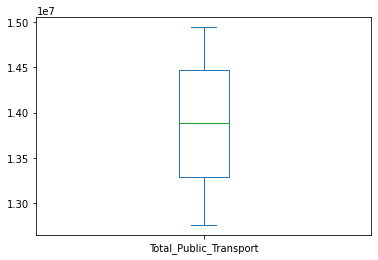

In [86]:
df1.Total_Public_Transport.plot.box() 

<AxesSubplot:>

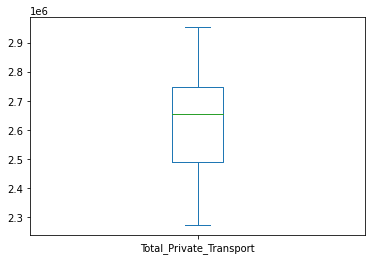

In [87]:
df1.Total_Private_Transport.plot.box() 

<AxesSubplot:>

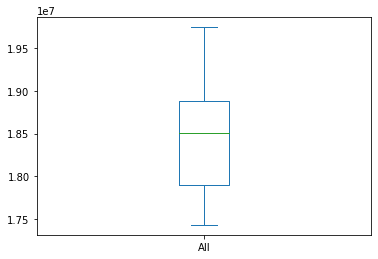

In [88]:
df1.All.plot.box() 

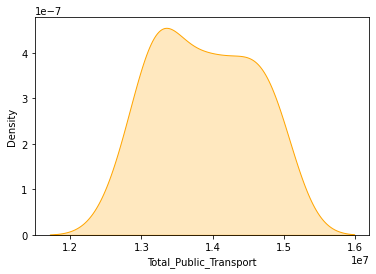

In [89]:
sns.kdeplot(df1['Total_Public_Transport'], shade=True, bw_method=0.5, color="orange")
plt.show()

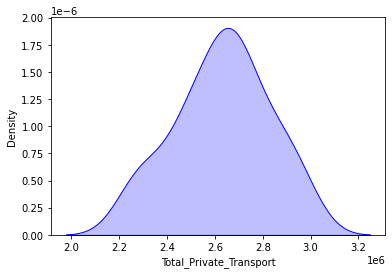

In [90]:
sns.kdeplot(df1['Total_Private_Transport'], shade=True, bw_method=0.5, color="blue")
plt.show()

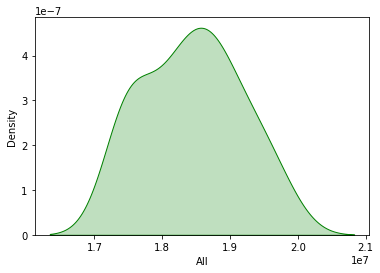

In [91]:
sns.kdeplot(df1['All'], shade=True, bw_method=0.5, color="green")
plt.show()

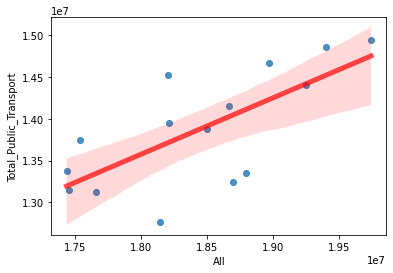

In [92]:
sns.regplot(x=df1["All"], y=df1["Total_Public_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

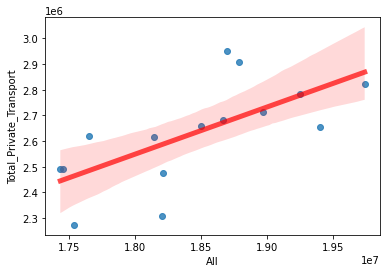

In [93]:
sns.regplot(x=df1["All"], y=df1["Total_Private_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

## Trips_InnerLondon

In [94]:
df2.describe()

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
count,15.000000,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,15.000000
mean,378073.066667,8.624817e+05,1.291350e+06,144569.800000,1.055642e+06,556684.866667,35642.533333,264099.066667,2.738285e+06,7.326828e+06,6.825640e+06,736897.200000
std,67449.577702,1.183589e+05,1.113824e+05,24503.087468,1.018925e+05,58471.550367,11493.588106,62035.384660,2.615995e+05,4.618908e+05,5.303358e+05,64145.981579
min,272187.000000,6.849250e+05,1.141730e+06,95226.000000,8.227780e+05,452071.000000,22493.000000,156906.000000,2.137644e+06,6.211414e+06,5.640832e+06,621842.000000
25%,327092.000000,7.492690e+05,1.170836e+06,136021.000000,9.772965e+05,522075.000000,25719.000000,200884.500000,2.604493e+06,7.073566e+06,6.456414e+06,700794.000000
50%,406607.000000,8.741490e+05,1.301793e+06,141712.000000,1.083251e+06,554717.000000,35528.000000,290407.000000,2.745817e+06,7.350749e+06,6.965303e+06,739876.000000
75%,424322.000000,9.687335e+05,1.381258e+06,152890.000000,1.135296e+06,579031.500000,41602.000000,314821.000000,2.922227e+06,7.617106e+06,7.238857e+06,772814.500000
max,485672.000000,1.001726e+06,1.450570e+06,196113.000000,1.182563e+06,653240.000000,62768.000000,338360.000000,3.137608e+06,7.964565e+06,7.474995e+06,834771.000000


<AxesSubplot:>

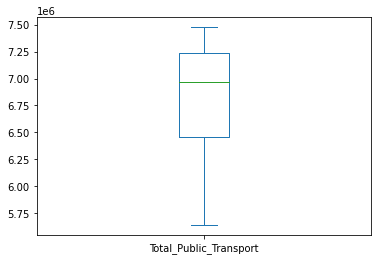

In [95]:
df2.Total_Public_Transport.plot.box() 

<AxesSubplot:>

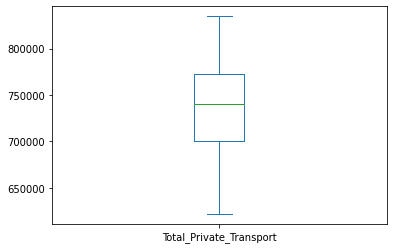

In [96]:
df2.Total_Private_Transport.plot.box() 

<AxesSubplot:>

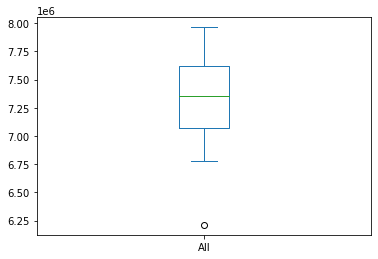

In [97]:
df2.All.plot.box()

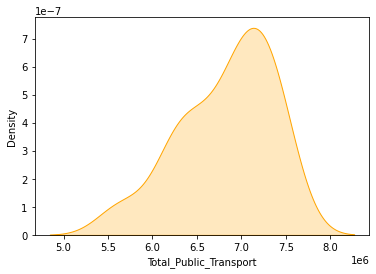

In [98]:
sns.kdeplot(df2['Total_Public_Transport'], shade=True, bw_method=0.5, color="orange")
plt.show()

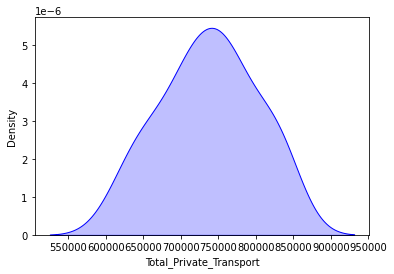

In [99]:
sns.kdeplot(df2['Total_Private_Transport'], shade=True, bw_method=0.5, color="blue")
plt.show()

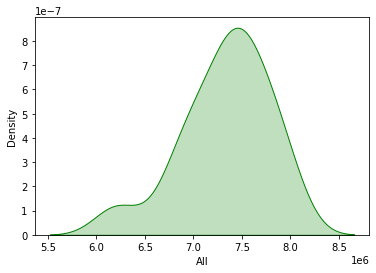

In [100]:
sns.kdeplot(df2['All'], shade=True, bw_method=0.5, color="green")
plt.show()

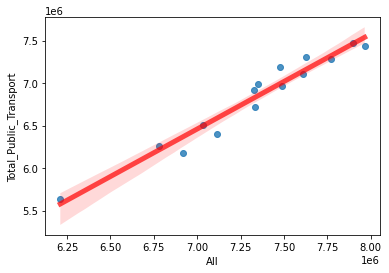

In [101]:
sns.regplot(x=df2["All"], y=df2["Total_Public_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

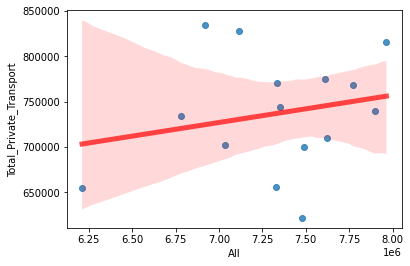

In [102]:
sns.regplot(x=df2["All"], y=df2["Total_Private_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

## Trips_OuterLondon

In [103]:
df3.describe()

ID,National_Rail,Underground/DLR,Bus/tram,Taxi/other,Car_driver,Car_passenger,Motorcycle,Cycle,Walk,All,Total_Public_Transport,Total_Private_Transport
count,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
mean,9.612979e+05,1.536533e+06,2.645923e+06,250938.866667,4.582044e+06,2.302501e+06,76809.800000,430485.200000,5.655738e+06,1.844227e+07,1.387590e+07,2.630250e+06
std,1.376512e+05,2.048776e+05,1.818662e+05,32235.939180,4.458371e+05,1.881855e+05,15164.447926,84628.877307,3.129867e+05,7.274290e+05,6.982595e+05,1.976920e+05
min,7.526920e+05,1.192066e+06,2.379287e+06,187576.000000,3.779301e+06,1.964597e+06,46903.000000,292407.000000,5.133199e+06,1.743343e+07,1.276190e+07,2.273165e+06
25%,8.294210e+05,1.352181e+06,2.477840e+06,242447.000000,4.278753e+06,2.173324e+06,63955.000000,348490.500000,5.464362e+06,1.789717e+07,1.329531e+07,2.491258e+06
50%,1.007982e+06,1.560290e+06,2.637303e+06,254256.000000,4.552362e+06,2.314611e+06,80988.000000,457926.000000,5.701901e+06,1.850087e+07,1.388301e+07,2.655705e+06
75%,1.078606e+06,1.727676e+06,2.811220e+06,272674.000000,4.925574e+06,2.414842e+06,90343.500000,490367.500000,5.833808e+06,1.887882e+07,1.446455e+07,2.747420e+06
max,1.120514e+06,1.808255e+06,2.987290e+06,294398.000000,5.235096e+06,2.589102e+06,94470.000000,550433.000000,6.305647e+06,1.974064e+07,1.493913e+07,2.952471e+06


<AxesSubplot:>

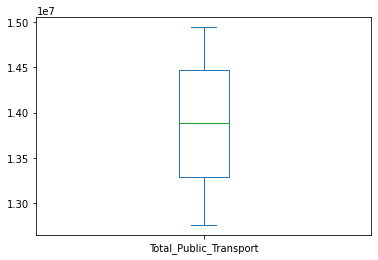

In [104]:
df3.Total_Public_Transport.plot.box() 

<AxesSubplot:>

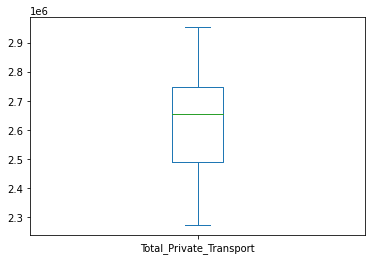

In [105]:
df3.Total_Private_Transport.plot.box() 

<AxesSubplot:>

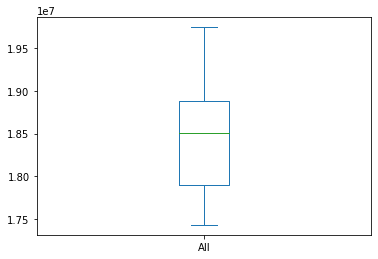

In [106]:
df3.All.plot.box()

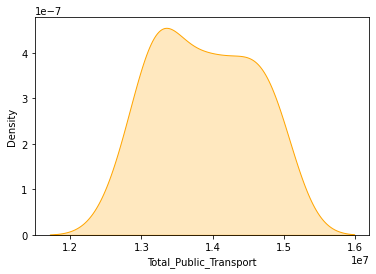

In [107]:
sns.kdeplot(df3['Total_Public_Transport'], shade=True, bw_method=0.5, color="orange")
plt.show()

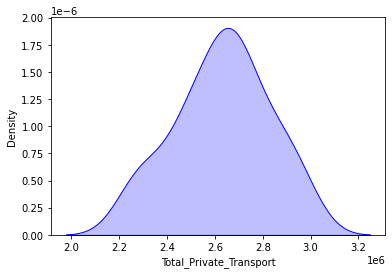

In [108]:
sns.kdeplot(df3['Total_Private_Transport'], shade=True, bw_method=0.5, color="blue")
plt.show()

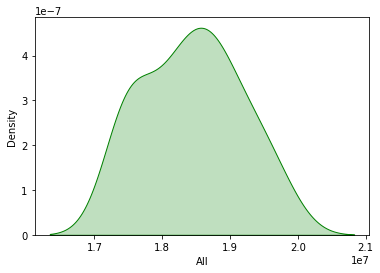

In [109]:
sns.kdeplot(df3['All'], shade=True, bw_method=0.5, color="green")
plt.show()

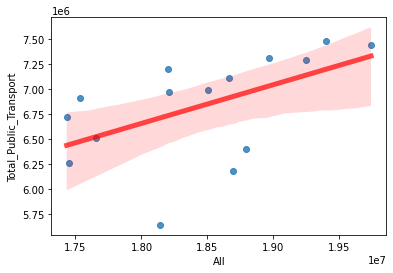

In [110]:
sns.regplot(x=df3["All"], y=df2["Total_Public_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

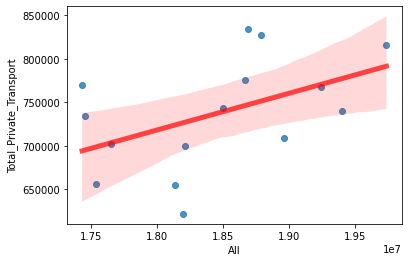

In [111]:
sns.regplot(x=df3["All"], y=df2["Total_Private_Transport"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

## Traffic flows by borough- all vehicles

In [112]:
df4.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,...,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879,930.787879
std,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,...,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460,384.884460
min,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
25%,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,...,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
50%,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,...,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
75%,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,...,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000
max,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000


In [113]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LA_Code          33 non-null     object
 1   Local_Authority  33 non-null     object
 2   1993             33 non-null     int64 
 3   1994             33 non-null     int64 
 4   1995             33 non-null     int64 
 5   1996             33 non-null     int64 
 6   1997             33 non-null     int64 
 7   1998             33 non-null     int64 
 8   1999             33 non-null     int64 
 9   2000             33 non-null     int64 
 10  2001             33 non-null     int64 
 11  2002             33 non-null     int64 
 12  2003             33 non-null     int64 
 13  2004             33 non-null     int64 
 14  2005             33 non-null     int64 
 15  2006             33 non-null     int64 
 16  2007             33 non-null     int64 
 17  2008             33 non-null     int6

<AxesSubplot:xlabel='LA_Code'>

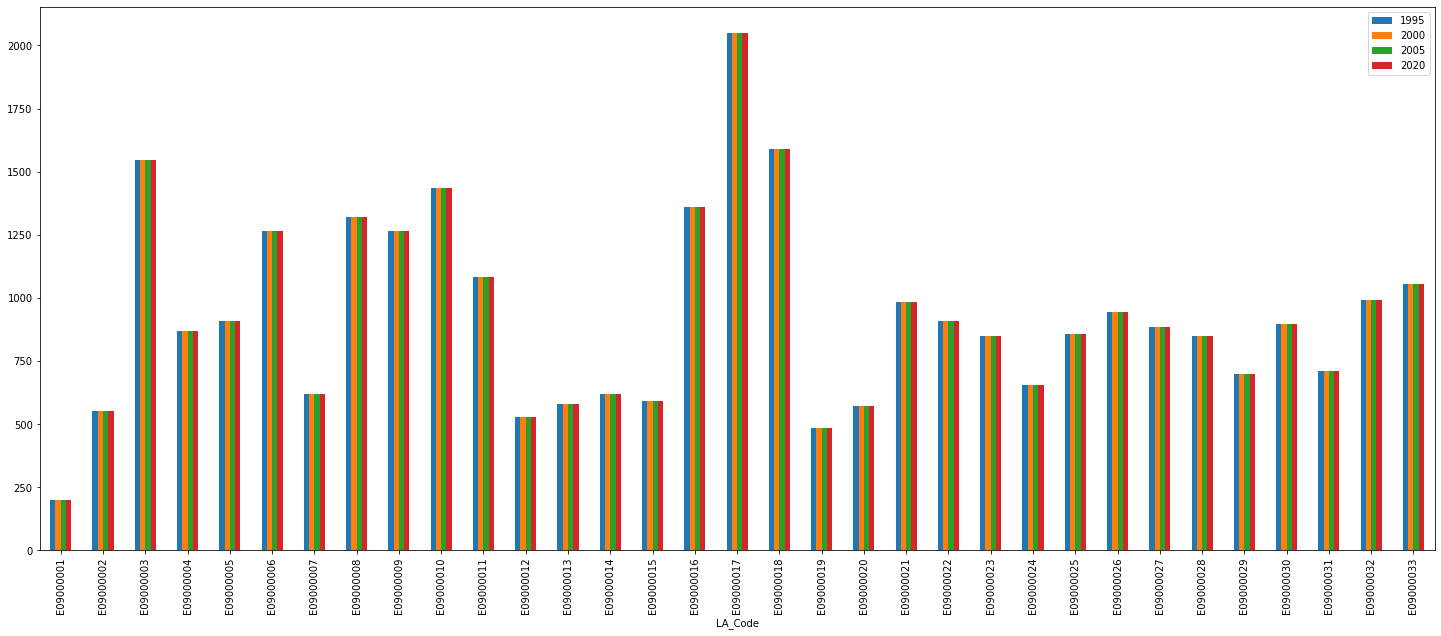

In [114]:
df4.plot(x="LA_Code", y=["1995", "2000", "2005", "2020"], kind="bar", figsize=(25,10))

In [115]:
pivot1 = df4.pivot_table(index=['LA_Code'], values=['1995', '2000', '2005', '2020'], aggfunc='mean')
print (pivot1)

           1995  2000  2005  2020
LA_Code                          
E09000001   200   200   200   200
E09000002   552   552   552   552
E09000003  1548  1548  1548  1548
E09000004   870   870   870   870
E09000005   909   909   909   909
E09000006  1264  1264  1264  1264
E09000007   619   619   619   619
E09000008  1321  1321  1321  1321
E09000009  1265  1265  1265  1265
E09000010  1436  1436  1436  1436
E09000011  1081  1081  1081  1081
E09000012   527   527   527   527
E09000013   579   579   579   579
E09000014   618   618   618   618
E09000015   592   592   592   592
E09000016  1360  1360  1360  1360
E09000017  2051  2051  2051  2051
E09000018  1591  1591  1591  1591
E09000019   485   485   485   485
E09000020   570   570   570   570
E09000021   983   983   983   983
E09000022   909   909   909   909
E09000023   850   850   850   850
E09000024   655   655   655   655
E09000025   857   857   857   857
E09000026   943   943   943   943
E09000027   884   884   884   884
E09000028   85

In [116]:
from pivottablejs import pivot_ui
pivot_ui(pivot1)

## Traffic flows by borough- cars

In [117]:
df5.describe()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,774.636364,783.393939,780.484848,788.151515,791.484848,794.090909,811.666667,802.666667,796.818182,795.484848,...,741.818182,745.545455,749.575758,769.666667,775.454545,777.939394,798.212121,825.787879,852.121212,678.121212
std,331.028494,337.617011,336.420600,343.937142,352.136437,358.213830,366.065966,360.844813,354.384542,357.819448,...,357.532556,372.893424,381.353349,390.934751,390.468316,393.197544,401.035983,418.117639,433.533069,337.946811
min,156.000000,158.000000,160.000000,163.000000,165.000000,167.000000,167.000000,163.000000,154.000000,147.000000,...,118.000000,115.000000,114.000000,119.000000,121.000000,115.000000,114.000000,115.000000,115.000000,87.000000
25%,516.000000,523.000000,520.000000,526.000000,528.000000,537.000000,548.000000,541.000000,540.000000,557.000000,...,519.000000,524.000000,536.000000,554.000000,563.000000,563.000000,583.000000,597.000000,619.000000,473.000000
50%,729.000000,739.000000,730.000000,750.000000,745.000000,740.000000,759.000000,740.000000,732.000000,738.000000,...,639.000000,642.000000,643.000000,674.000000,669.000000,680.000000,697.000000,726.000000,752.000000,599.000000
75%,886.000000,898.000000,890.000000,887.000000,896.000000,901.000000,919.000000,907.000000,903.000000,915.000000,...,986.000000,971.000000,1000.000000,1016.000000,1024.000000,1023.000000,1053.000000,1093.000000,1097.000000,913.000000
max,1754.000000,1787.000000,1792.000000,1823.000000,1865.000000,1920.000000,1949.000000,1929.000000,1886.000000,1906.000000,...,1758.000000,1829.000000,1883.000000,1940.000000,1911.000000,1947.000000,1969.000000,2077.000000,2153.000000,1662.000000


<AxesSubplot:xlabel='LA_Code'>

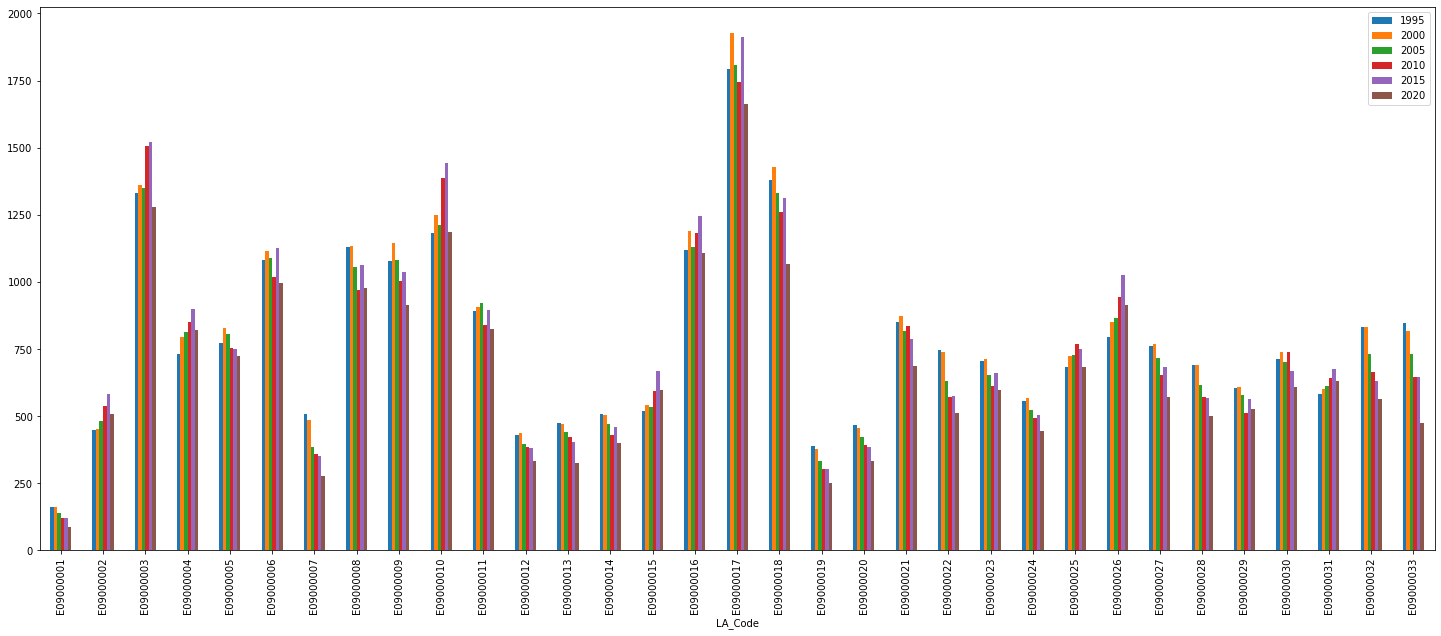

In [118]:
df5.plot(x="LA_Code", y=["1995", "2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(25,10))

In [119]:
pivot2 = df5.pivot_table(index=['LA_Code'], values=['1995', '2000', '2005', '2020'], aggfunc='sum')
print (pivot2)

           1995  2000  2005  2020
LA_Code                          
E09000001   160   163   140    87
E09000002   448   451   481   509
E09000003  1332  1360  1349  1278
E09000004   730   794   815   821
E09000005   773   827   806   724
E09000006  1081  1115  1090   994
E09000007   506   485   385   277
E09000008  1130  1134  1055   978
E09000009  1078  1146  1083   914
E09000010  1183  1248  1212  1187
E09000011   890   907   922   824
E09000012   430   438   397   331
E09000013   476   471   442   326
E09000014   509   504   469   400
E09000015   520   541   532   596
E09000016  1119  1189  1131  1109
E09000017  1792  1929  1807  1662
E09000018  1380  1428  1330  1068
E09000019   387   378   332   252
E09000020   468   457   421   333
E09000021   850   874   816   685
E09000022   745   737   629   511
E09000023   706   714   652   599
E09000024   556   569   522   443
E09000025   684   725   729   681
E09000026   794   849   864   913
E09000027   762   767   715   571
E09000028   69

In [120]:
from pivottablejs import pivot_ui
pivot_ui(pivot2)

## London Borough Profiles

In [121]:
df6.describe()

,"Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)"
count,33.000000,33.000000
mean,80739.818182,0.333333
std,34808.818861,0.478714
min,1692.000000,0.000000
25%,56966.000000,0.000000
50%,76507.000000,0.000000
75%,106339.000000,1.000000
max,153908.000000,1.000000


<AxesSubplot:xlabel='Area_name'>

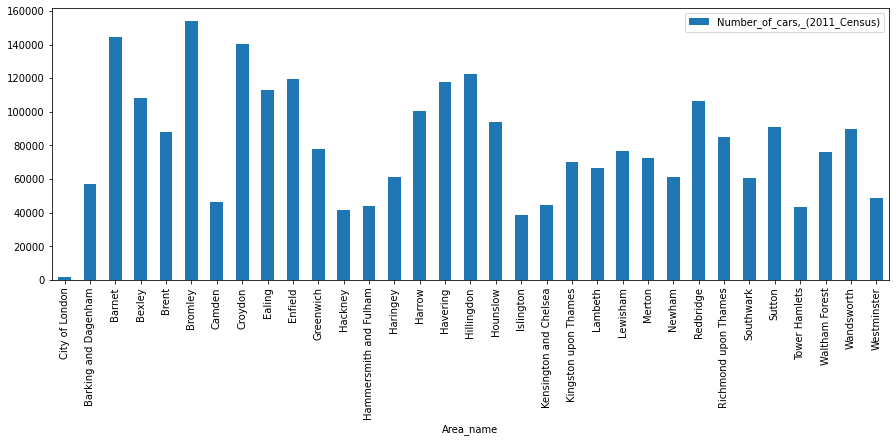

In [122]:
df6.plot(x="Area_name", y=["Number_of_cars,_(2011_Census)"], kind="bar", figsize=(15,5))

# 4. Multiple Regression

In [123]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [124]:
Trips_GreaterLondon = df1.filter(['All','Total_Public_Transport','Total_Private_Transport'], axis=1)

In [125]:
Trips_GreaterLondon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   All                      15 non-null     int64
 1   Total_Public_Transport   15 non-null     int64
 2   Total_Private_Transport  15 non-null     int64
dtypes: int64(3)
memory usage: 1.0+ KB


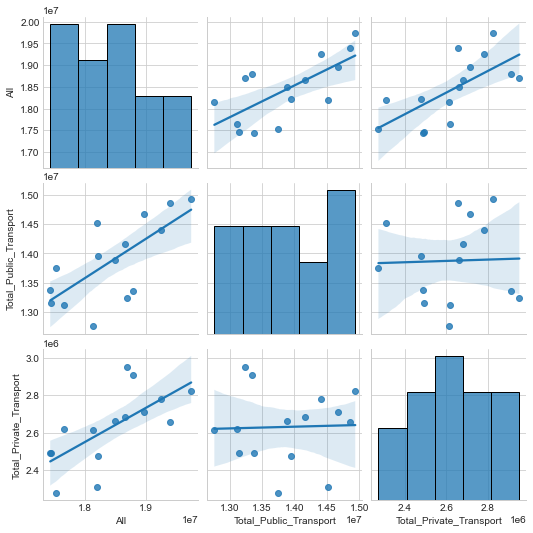

In [131]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(Trips_GreaterLondon, kind="reg")
plt.show()

In [132]:
x1 = Trips_GreaterLondon[['Total_Public_Transport','Total_Private_Transport']] #independent variables
y1 = Trips_GreaterLondon['All'] # dependent variable

In [133]:
sm_x1 = sm.add_constant(x1)
multiple_regression_model1 = sm.OLS(y1, sm_x1)
multiple_regression1 = multiple_regression_model1.fit()

In [134]:
print(multiple_regression1.summary())

                            OLS Regression Results                            
Dep. Variable:                    All   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     69.97
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.43e-07
Time:                        18:08:58   Log-Likelihood:                -204.19
No. Observations:                  15   AIC:                             414.4
Df Residuals:                      12   BIC:                             416.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


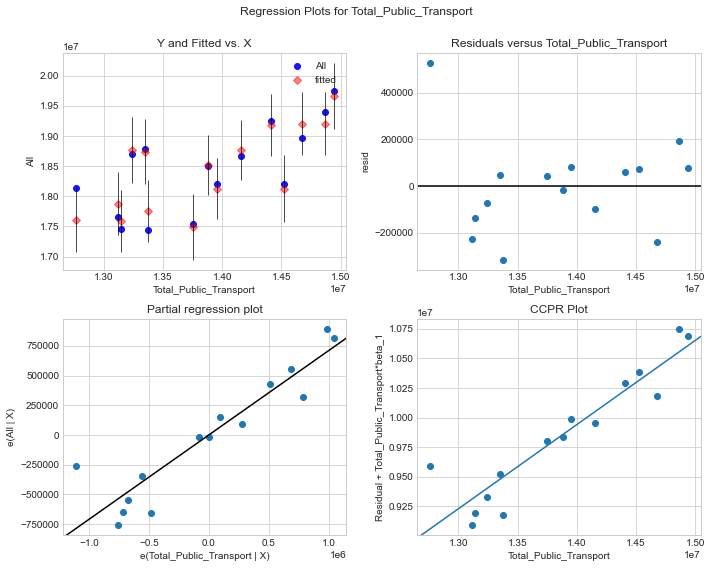

In [135]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression1, 'Total_Public_Transport', fig=fig)

eval_env: 1


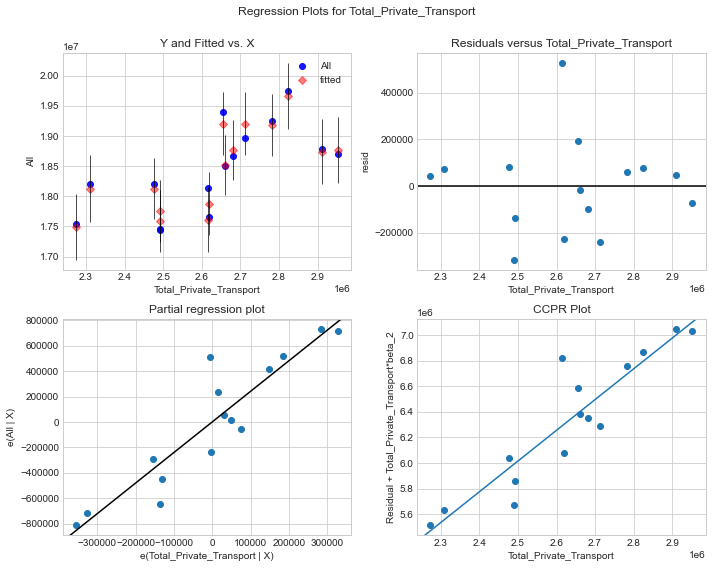

In [136]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression1, 'Total_Private_Transport', fig=fig)

In [137]:
Trips_InnerLondon = df2.filter(['All','Total_Public_Transport','Total_Private_Transport'], axis=1)

In [138]:
Trips_InnerLondon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   All                      15 non-null     int64
 1   Total_Public_Transport   15 non-null     int64
 2   Total_Private_Transport  15 non-null     int64
dtypes: int64(3)
memory usage: 1.0+ KB


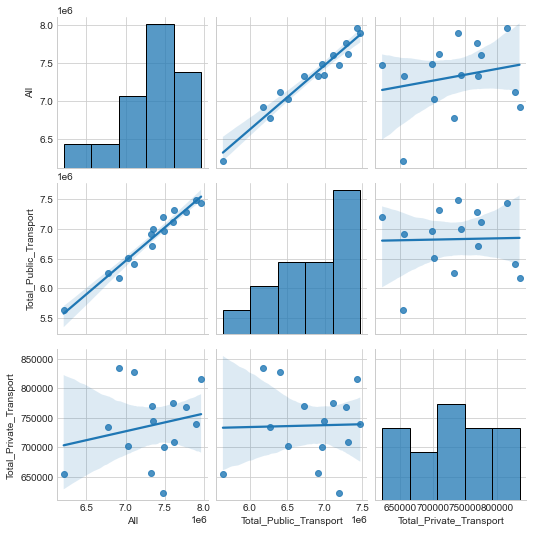

In [140]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(Trips_InnerLondon, kind="reg")
plt.show()

In [141]:
x2 = Trips_InnerLondon[['Total_Public_Transport','Total_Private_Transport']] #independent variables
y2 = Trips_InnerLondon['All'] # dependent variable

In [142]:
sm_x2 = sm.add_constant(x2)
multiple_regression_model2 = sm.OLS(y2, sm_x2)
multiple_regression2 = multiple_regression_model2.fit()

In [155]:
print(multiple_regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                    All   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     442.6
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           5.73e-12
Time:                        18:59:10   Log-Likelihood:                -184.06
No. Observations:                  15   AIC:                             374.1
Df Residuals:                      12   BIC:                             376.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

eval_env: 1


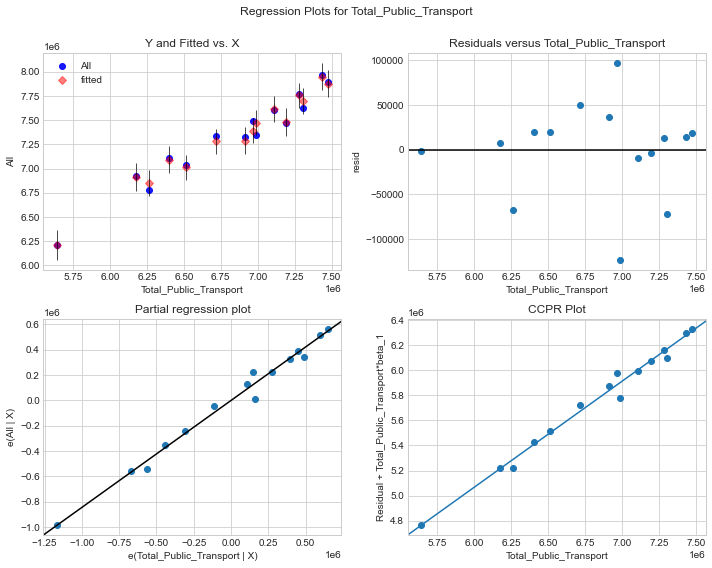

In [156]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression2, 'Total_Public_Transport', fig=fig)

eval_env: 1


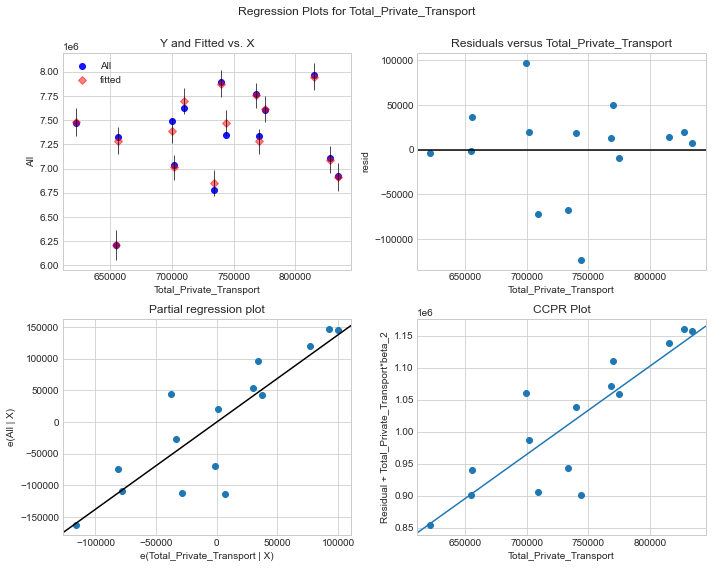

In [145]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression2, 'Total_Private_Transport', fig=fig)

In [146]:
Trips_OuterLondon = df3.filter(['All','Total_Public_Transport','Total_Private_Transport'], axis=1)

In [147]:
Trips_OuterLondon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005/06 to 2019/20
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   All                      15 non-null     int64
 1   Total_Public_Transport   15 non-null     int64
 2   Total_Private_Transport  15 non-null     int64
dtypes: int64(3)
memory usage: 1.0+ KB


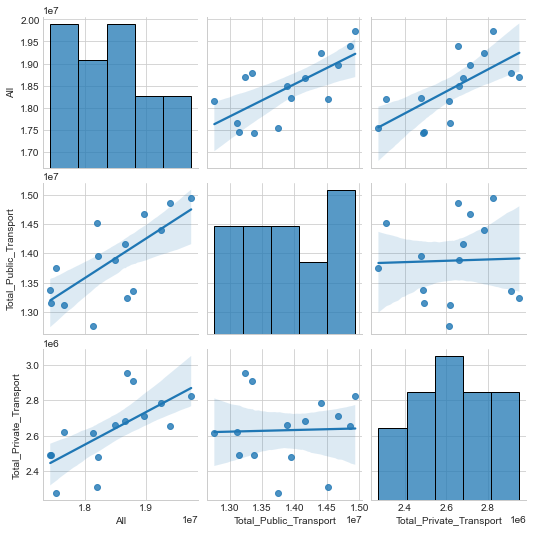

In [148]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(Trips_OuterLondon, kind="reg")
plt.show()

In [149]:
x3 = Trips_OuterLondon[['Total_Public_Transport','Total_Private_Transport']] #independent variables
y3 = Trips_OuterLondon['All'] # dependent variable

In [150]:
sm_x3 = sm.add_constant(x3)
multiple_regression_model3 = sm.OLS(y3, sm_x3)
multiple_regression3 = multiple_regression_model3.fit()

In [151]:
print(multiple_regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                    All   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     69.97
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.43e-07
Time:                        18:09:31   Log-Likelihood:                -204.19
No. Observations:                  15   AIC:                             414.4
Df Residuals:                      12   BIC:                             416.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


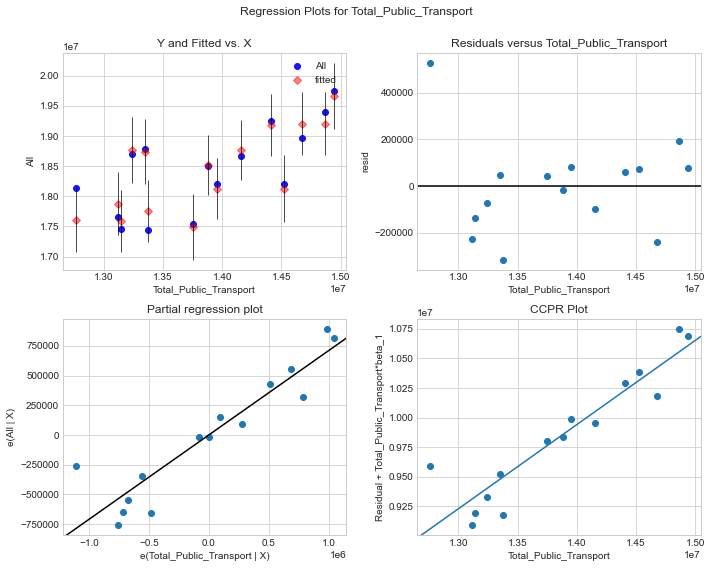

In [152]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression3, 'Total_Public_Transport', fig=fig)

eval_env: 1


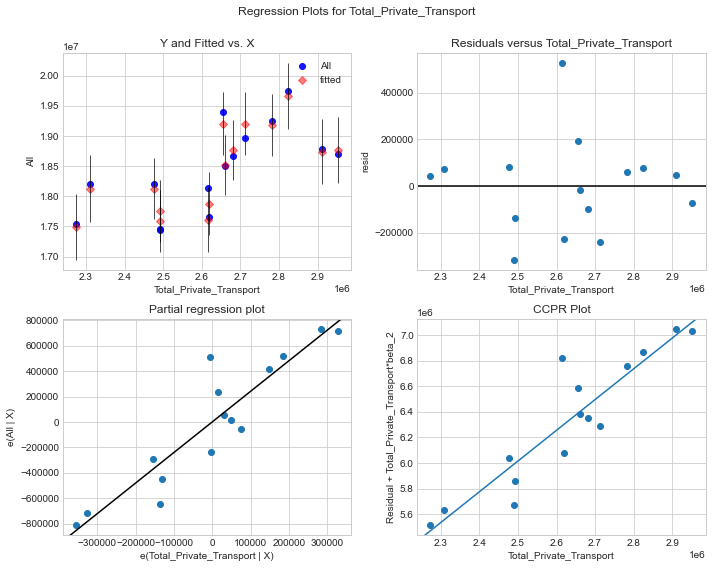

In [153]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multiple_regression3, 'Total_Private_Transport', fig=fig)

end of notebook